In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
# Load dataset
df = pd.read_csv("../data/raw_analyst_ratings.csv")

In [12]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [13]:
# Determine date ranges
date_ranges = df.groupby("stock").agg({"date": ["min", "max"]})
date_ranges

date                          
                            min                       max
stock                                                    
A     2020-05-22 08:06:17-04:00 2020-06-05 10:30:54-04:00
AA    2020-05-18 10:50:11-04:00 2020-06-09 10:52:15-04:00
AAC   2019-08-30 08:10:37-04:00 2019-10-25 16:09:59-04:00
AADR  2013-03-05 15:42:46-04:00 2013-09-06 15:06:35-04:00
AAL   2020-06-08 10:19:28-04:00 2020-06-10 11:21:01-04:00
...                         ...                       ...
ZTR   2016-04-01 15:23:43-04:00 2020-03-19 10:49:42-04:00
ZTS   2020-05-05 12:44:19-04:00 2020-06-11 10:22:31-04:00
ZU    2015-08-17 10:36:13-04:00 2020-01-09 14:34:23-04:00
ZUMZ  2020-04-13 10:01:37-04:00 2020-06-05 07:24:15-04:00
ZX    2017-11-14 13:25:57-04:00 2018-06-15 09:01:12-04:00

[6204 rows x 2 columns]

In [17]:
# Fetch stock data for 'A' within its date range
stock = "A"
start_date = date_ranges.loc[stock, ("date", "min")]
end_date = date_ranges.loc[stock, ("date", "max")]
stock_data = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [18]:
# Calculate daily returns
stock_data["Daily_Return"] = stock_data["Close"].pct_change()

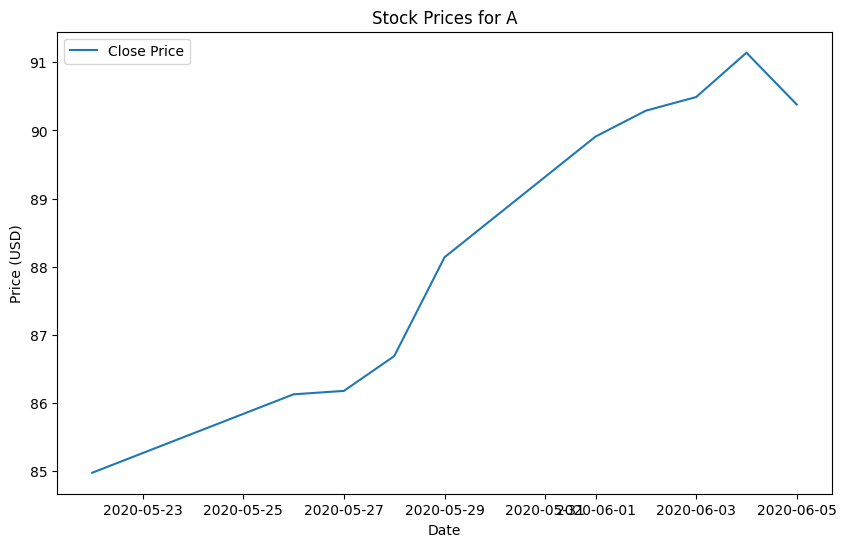

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2020-05-22  85.000000  87.669998  84.199997  84.980003  82.769768  5063100   
2020-05-26  86.230003  86.790001  85.639999  86.129997  83.889854  3173400   
2020-05-27  86.300003  86.480003  84.370003  86.180000  83.938553  1917600   
2020-05-28  86.870003  87.849998  86.059998  86.690002  84.435287  1908700   
2020-05-29  87.169998  88.489998  86.470001  88.139999  85.847565  2394500   

            Daily_Return  
Date                      
2020-05-22           NaN  
2020-05-26      0.013533  
2020-05-27      0.000581  
2020-05-28      0.005918  
2020-05-29      0.016726  


In [19]:
# Plot the stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data["Close"], label="Close Price")
plt.title("Stock Prices for A")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Print the first few rows of the data
print(stock_data.head())